In [3]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('factbook.db')
query = 'select * from sqlite_master where type="table"'

pd.read_sql_query(query, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [6]:
query2 = 'select * from facts limit 5'
pd.read_sql_query(query2,conn)
query3 = 'select * from facts where name = "Russia" or name = "Russian Federation"'
pd.read_sql_query(query3,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,143,rs,Russia,17098242,16377742,720500,142423773,0.04,11.6,13.69,1.69


In [9]:
query4 = 'select * from facts where name = "USA" or name = "United States"'
pd.read_sql_query(query4,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,186,us,United States,9826675,9161966,664709,321368864,0.78,12.49,8.15,3.86


In [13]:
population = 'select min(population), max(population), min(population_growth), max(population_growth)\
              from facts'
pd.read_sql_query(population, conn)

,min(population),max(population),min(population_growth),max(population_growth)
0,0,7256490011,0.0,4.02


In [15]:
zero_pop = 'select * from facts where population = 0'
pd.read_sql_query(zero_pop, conn)


,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [19]:
max_pop = 'select *, max(population) from facts'
pd.read_sql_query(max_pop, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,max(population)
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None,7256490011


#### My thoughts about last observation(World)
As we can see on birth_rate vs death_rate. Huge up trend of population growth
Population increses very fast that may cause some troubles. 
I remember that more than 100m. people right now is facing starvation.

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfcbc6bf98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fcfc96d9278>]], dtype=object)

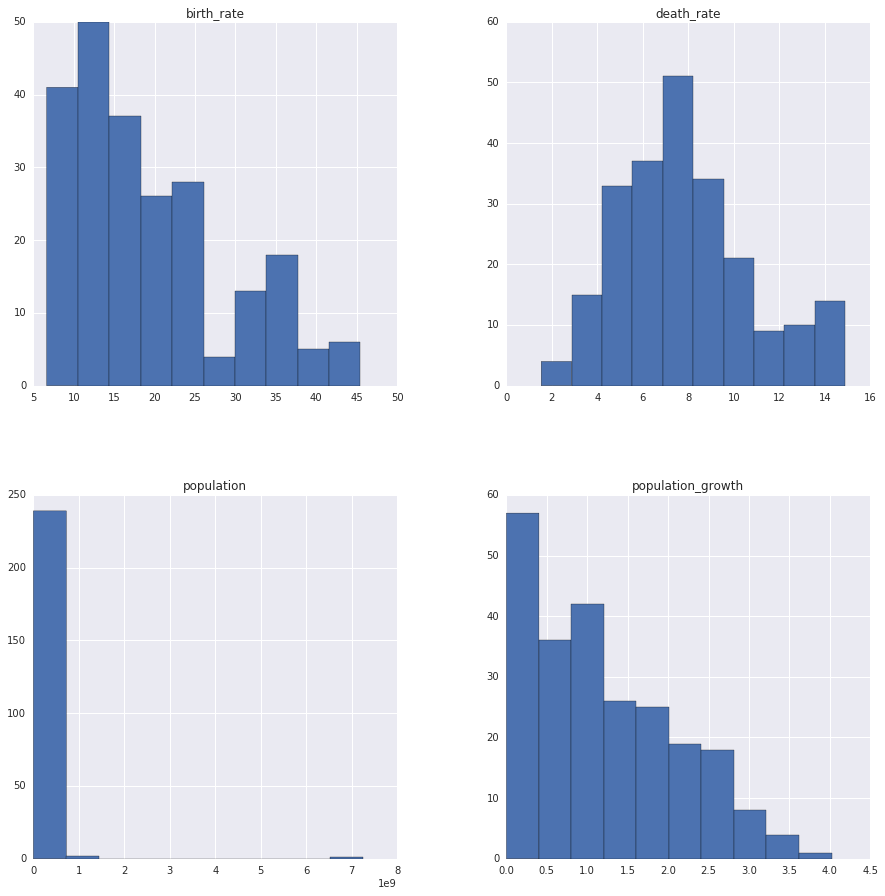

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

hist_q = 'select population, population_growth, birth_rate, death_rate from facts'
pop_df = pd.read_sql_query(hist_q, conn)

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)
pop_df.hist(ax=ax)


         name       density
0       Macau  21168.964286
1      Monaco  15267.500000
2   Singapore   8141.279770
3   Hong Kong   6445.041516
4  Gaza Strip   5191.819444
5   Gibraltar   4876.333333
6     Bahrain   1771.859211
7    Maldives   1319.640940
8       Malta   1310.015823
9     Bermuda   1299.925926


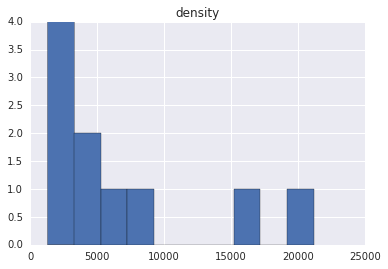

In [17]:
pop_dens = 'select name, cast(population as float)/cast(area as float) density from facts order by density desc LIMIT 10'
pop_h = pd.read_sql_query(pop_dens, conn)
pop_h.hist()
print(pop_h)

In [13]:
pop_h

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926
